## Autor: Pablo Veloz M.

In [5]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.patches as mpatches
#import lec4_graphs as gfx
import ipywidgets as widgets 
from ipywidgets import interact, interact_manual
from IPython.display import display
from ipywidgets import Checkbox
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
import missingno as msng
import factor_analyzer as factor
from factor_analyzer import FactorAnalyzer


## Desafío 1: Lectura de archivos
   * Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
   * Importe la base de datos bfi.csv y asígnela a un objeto df .
   * Solicite las primeras 5 observaciones con head .

In [6]:
df = pd.read_csv('bfi.csv', encoding = 'ISO-8859-1',sep=',', engine='python')

In [7]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


## Desafío 2: Preprocesamiento
* Elimine las columnas redundantes de la base, tal como 'Unnamed: 0' .
* Analice el patrón de datos perdidos con missingno . Comente cuáles son las principales
* variables con mayores tasas de valores perdidos.
* Genere un nuevo objeto donde almacenará la base sin valores perdidos.

In [8]:
df=df.drop("Unnamed: 0",axis=1)

In [9]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


<Figure size 288x288 with 0 Axes>

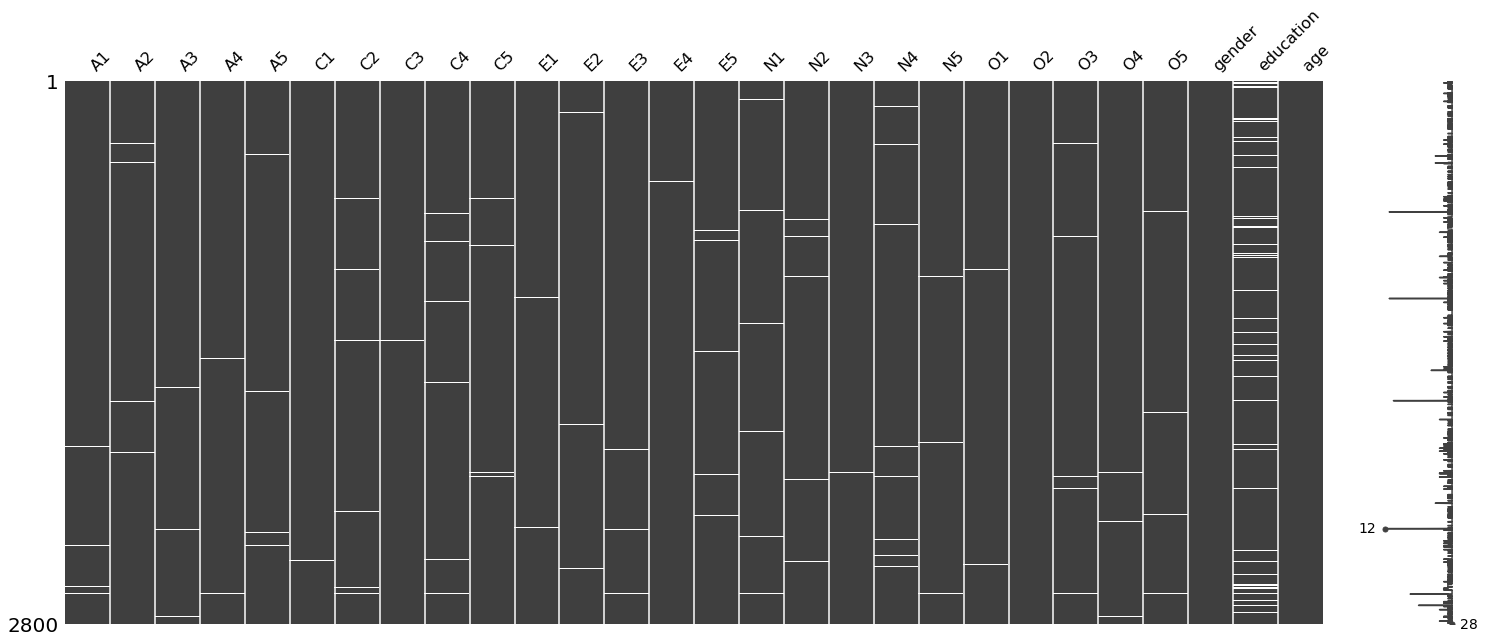

In [10]:
plt.figure(figsize=(4,4))
msng.matrix(df.replace([8, 9], [np.nan, np.nan]));

In [11]:
df.shape
#df.sample(5)
valores_perdidos=df.isnull().sum()
print("Valores perdidos por columnas:\n",valores_perdidos)

Valores perdidos por columnas:
 A1            16
A2            27
A3            26
A4            19
A5            16
C1            21
C2            24
C3            20
C4            26
C5            16
E1            23
E2            16
E3            25
E4             9
E5            21
N1            22
N2            21
N3            11
N4            36
N5            29
O1            22
O2             0
O3            28
O4            14
O5            20
gender         0
education    223
age            0
dtype: int64


In [12]:

#df2=df.dropna()
df2=df[["A1","A2","A3","A4","A5","C1","C2","C3","C4","C5","N1","N2","N3","N4","N5","O1","O2","O3","O4","O5"]]
df2=df2.dropna()
valores_perdidos2=df2.isnull().sum()
print(valores_perdidos2)

A1    0
A2    0
A3    0
A4    0
A5    0
C1    0
C2    0
C3    0
C4    0
C5    0
N1    0
N2    0
N3    0
N4    0
N5    0
O1    0
O2    0
O3    0
O4    0
O5    0
dtype: int64


In [13]:
df2.shape

(2499, 20)

<Figure size 288x288 with 0 Axes>

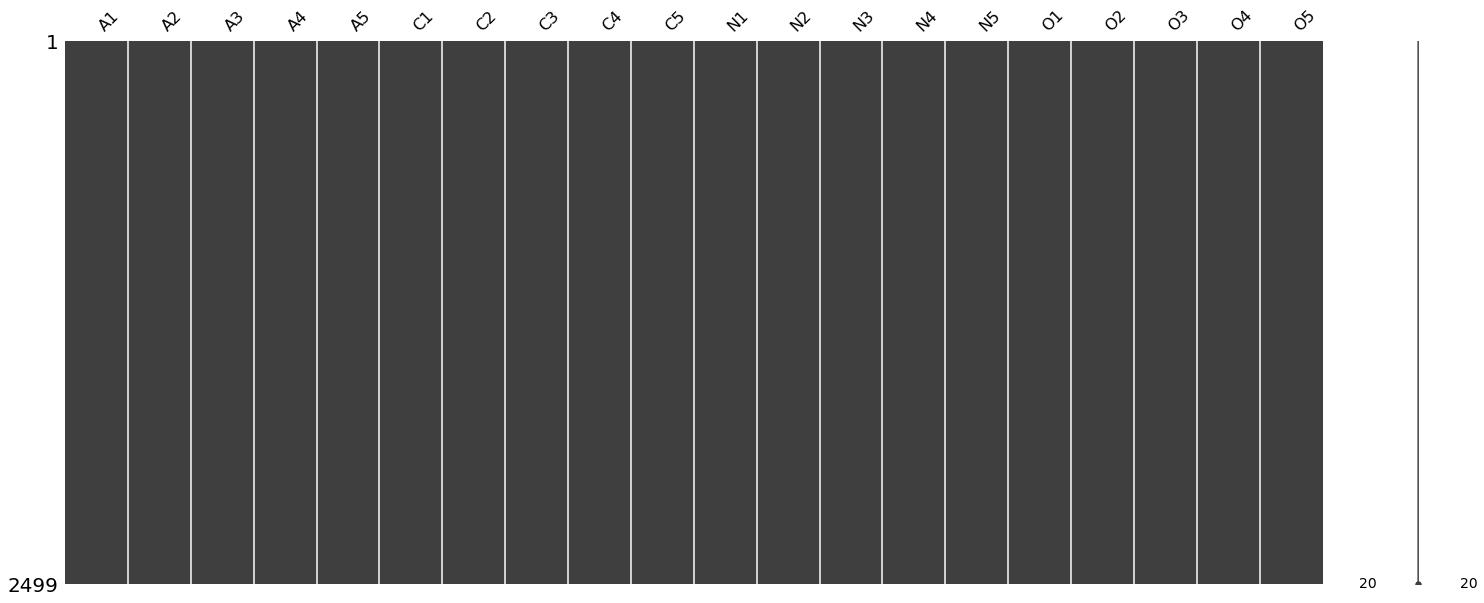

In [14]:
plt.figure(figsize=(4,4))
msng.matrix(df2.replace([8, 9], [np.nan, np.nan]));

### __De lo anterior, nos aseguramos que el objeto df2 es un objeto Dataframe sin valores perdidos.__

## Desafío 3: Descripción
   * Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.
   * Reporte las medias para cada uno de las preguntas de la batería. Esto lo puede lograr con un dotplot.
   * Genere una matriz de correlaciones con este nuevo objeto. Visualícelo con heatmap .
   * Comente sobre los principales patrones de correlación entre las preguntas de la batería.

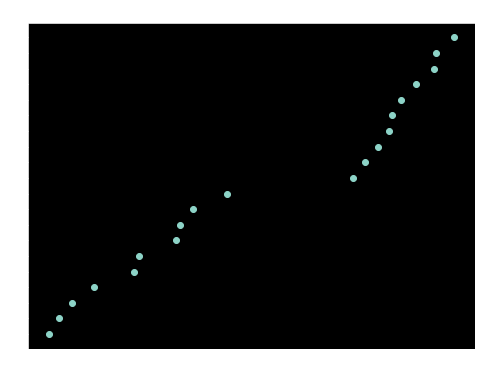

In [15]:
variable = []
mean = []
# para cada columna de la base, extraemos su nombre y sus valores
for colname, serie in df2.iteritems():
# guardamos el nombre en variable
    variable.append(colname)
# calculamos y procesamos la media
    mean.append(serie.mean())
dataframe = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])
fig= plt.figure(figsize=(8,6))
with plt.style.context('dark_background'):
    plt.plot(dataframe['mean'], dataframe['var'],'o')
    plt.title("Media vs Variables")
plt.show()

Text(0.5, 1, 'Heatmap Variables')

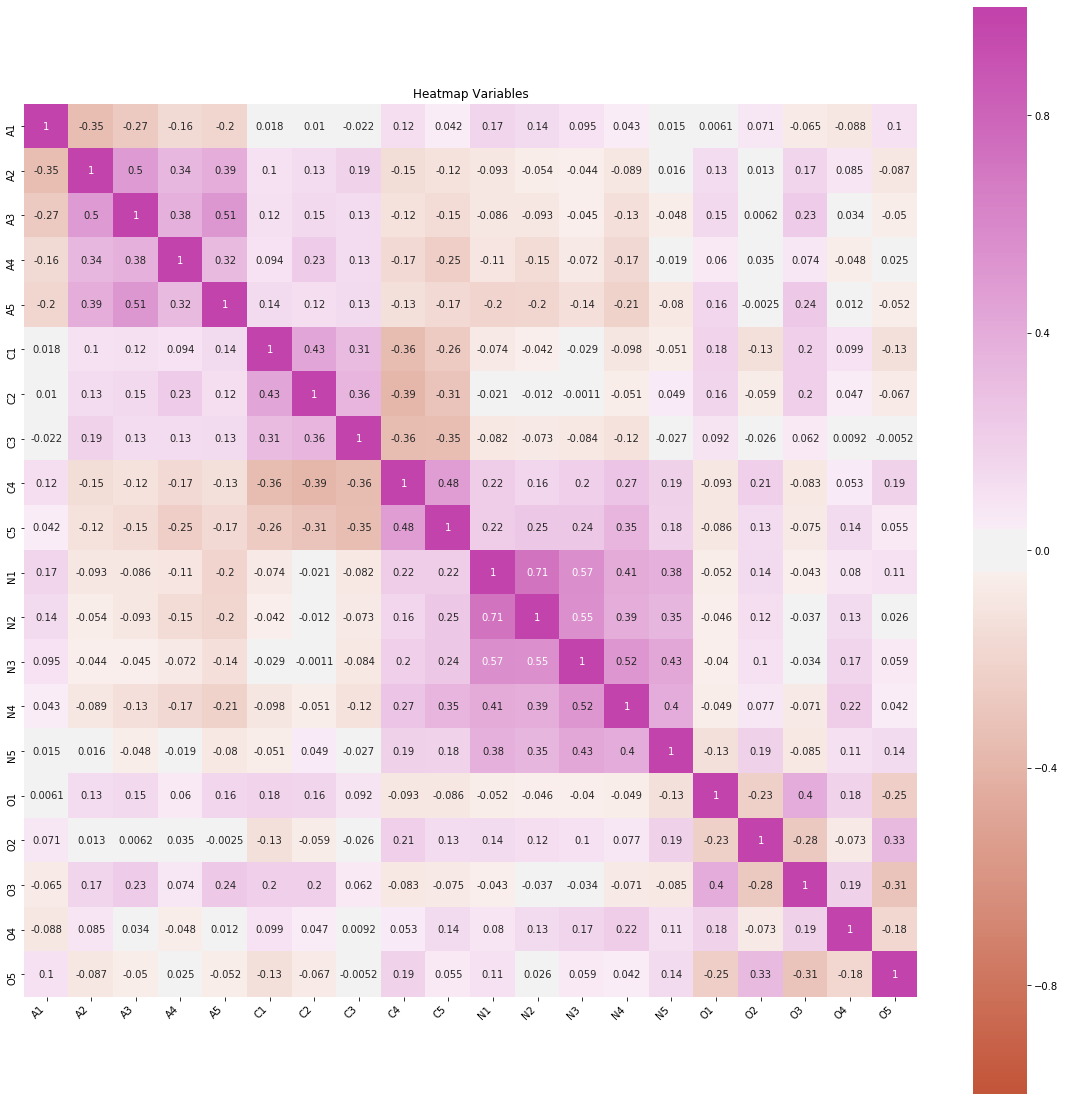

In [16]:
plt.figure(figsize = (20,20))
corr = df2.corr()
ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 320, n=250),square=True,annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
plt.title("Heatmap Variables")

In [17]:
def correlacionadas2(dataframe,valor):
    lista_correlacionadas=[]
    df_map=dataframe
    df_map_prep=df_map.corr()
    for i in dataframe.columns:
        for j in dataframe.columns:
            correlacion=df_map[i].corr(df_map[j])
            if abs(correlacion) > valor and int(correlacion)!=1:
                lista_correlacionadas.append((i,j,round(correlacion,4)))
    for i,n in enumerate(lista_correlacionadas):
        if lista_correlacionadas[i][0]==lista_correlacionadas[i][1] or lista_correlacionadas[i][2]==np.float64(1.0):
            lista_correlacionadas.remove(lista_correlacionadas[i])
    return lista_correlacionadas

In [18]:
listacorr=correlacionadas2(df2,0.7)
for i,n in enumerate(listacorr):
    if listacorr[i][2] == 1.0:
        pass
    else:
        print("*"+listacorr[i][0]+" con la variable "+listacorr[i][1]+"tienen correlacion: "+str(listacorr[i][2]))

*N1 con la variable N2tienen correlacion: 0.7144
*N2 con la variable N1tienen correlacion: 0.7144


## Desafío 4: Extracción de factores
* Antes de iniciar la extracción de factores, inspeccione la ideonidad de la batería de preguntaspara realizar un análisis factorial mediante la prueba de esferacidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.
* Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.
* Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
* Refactorice el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.
* Extraiga las cargas del modelo e identifique qué items están asociados a cada factor.
* Comente sobre qué significa cada factor construído.

### __Prueba Esfericidad Barlett__

In [19]:
factor.calculate_bartlett_sphericity(df2)

(12874.935996898563, 0.0)

### __Prueba Kaiser-Meyer-Olkin__

In [20]:
factor.calculate_kmo(df2)

(         KMO
 A1  0.751053
 A2  0.794248
 A3  0.788150
 A4  0.833159
 A5  0.834551
 C1  0.827151
 C2  0.774211
 C3  0.833553
 C4  0.810579
 C5  0.846924
 N1  0.775542
 N2  0.770078
 N3  0.860389
 N4  0.856373
 N5  0.866642
 O1  0.791949
 O2  0.768413
 O3  0.761004
 O4  0.761322
 O5  0.753575, 0.8075071016859822)

In [21]:
kmo_all,kmo_model=factor.calculate_kmo(df2)
print("Nuestro KMO para el modelo será:", kmo_model)

Nuestro KMO para el modelo será: 0.8075071016859822


### __Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.__

In [22]:
fa = factor.FactorAnalyzer()
fa.analyze(df2, 10, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev
#plt.plot(factor_screeplot.index+1, factor_screeplot.values, 'o-', color='tomato')
#plt.xlabel('Número de Factor')
#plt.ylabel('Valores Propios')
# visualizamos el criterio de corte
#plt.axhline(1)
#plt.title("Scree plot");

,Original_Eigenvalues
0,4.036227
1,2.481430
2,1.902593
3,1.783091
4,1.063741
5,0.954692
6,0.771723
7,0.713478
8,0.709901
9,0.649756


### __Como nuestro KMO=0.807 para n=8 será conveniente para análisis factorial planificado.__
   ### - __Podemos apoyarnos en la siguiente Grafica:__

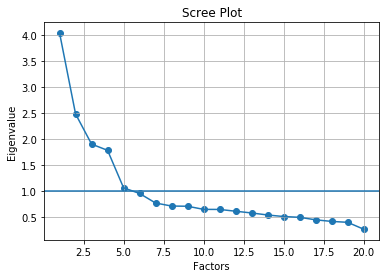

In [23]:
plt.scatter(range(1,df2.shape[1]+1),ev)
plt.plot(range(1,df2.shape[1]+1),ev)
plt.axhline(1)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


### Al cabo del 5to punto, la variación de los datos no es significativa.
## __Refactorizando el modelo para 8 factores relevantes.__

In [24]:
fa = FactorAnalyzer()
fa.analyze(df2, 5)
fa.loadings


,Factor1,Factor2,Factor3,Factor4,Factor5
A1,0.184051,0.048843,-0.362380,0.004154,-0.184534
A2,0.028601,0.035161,0.672794,0.013957,0.102701
A3,0.115793,-0.064051,0.786266,0.077186,-0.074540
A4,0.020551,0.143112,0.485085,-0.111436,-0.095518
A5,-0.028022,-0.040467,0.623642,0.088882,-0.087765
C1,0.035238,0.565339,-0.045720,0.148854,0.085796
C2,0.109388,0.684404,0.012135,0.028605,0.093778
C3,-0.000024,0.573841,0.036568,-0.084237,0.018887
C4,0.123288,-0.620936,0.045203,-0.054045,0.080914
C5,0.104585,-0.510559,-0.042250,0.036412,0.263910


In [25]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.170550,1.812608,1.919400,1.392113,0.818881
Proportion Var,0.108528,0.090630,0.095970,0.069606,0.040944
Cumulative Var,0.108528,0.199158,0.295128,0.364734,0.405678


## Variación acumulativa total del __40.5%__ explicada por los 8 factores.

In [26]:
factor_loadings=fa.loadings
factor_loadings.applymap(lambda x: np.where(x<.4, ' ', round(x, 2)))

,Factor1,Factor2,Factor3,Factor4,Factor5
A1,,,,,
A2,,,0.67,,
A3,,,0.79,,
A4,,,0.49,,
A5,,,0.62,,
C1,,0.57,,,
C2,,0.68,,,
C3,,0.57,,,
C4,,,,,
C5,,,,,


### - El factor 1 tiene cargas de factor altas para N1,N2,N3
### - El factor 2 tiene cargas de factor altas para C1,C2,C3
### - El factor 3 tiene cargas de factor altas para A2,A3,A4,A5
### - El factor 4 tiene cargas de factor altas para O1,O3
### - El factor 5 tiene cargas de factor altas para n4 

## Desafío 5: Modelación de factores
* Extraiga los puntajes del modelo factorial a su base de datos.
* Grafique la densidad de cada uno con kdplot .

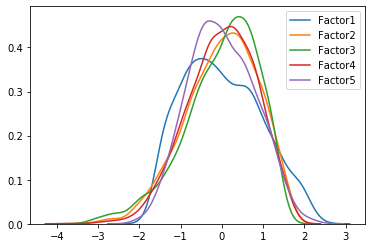

In [27]:
extract_factor_scores = fa.get_scores(df2)
for i in range(1,6):
    factor="Factor"+str(i)
    sns.kdeplot(extract_factor_scores.loc[:, "Factor"+str(i)])
#label=""

## Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:

$y=\beta_{0}+\beta_{1}\cdot \bf{gender}+\beta_{2}\cdot \bf{education}+\beta_{3}\cdot \bf{age} +\epsilon_{i}$

In [29]:
df3=df[["gender","education","age"]]

Text(0.5, 1, 'Heatmap Variables')

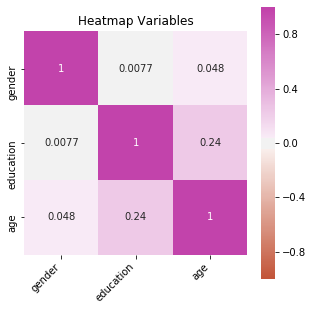

In [30]:
plt.figure(figsize = (5,5))
corr = df3.corr()
ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 320, n=250),square=True,annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
plt.title("Heatmap Variables")

In [31]:
import factor_analyzer as factor3
barl_sphe_df3=factor3.calculate_bartlett_sphericity(df3)
kmo_all_df3,kmo_model_df3=factor3.calculate_kmo(df3)
print("Bartlett Sphericity: ",round(barl_sphe_df3[1],3))
print("KMO Model: ",kmo_model_df3)


Bartlett Sphericity:  0.0
KMO Model:  0.5136882405938019


In [32]:
fa3 = factor3.FactorAnalyzer()
fa3.analyze(df3, 3, rotation=None)
# Check Eigenvalues
ev, v = fa3.get_eigenvalues()
ev

,Original_Eigenvalues
0,1.246085
1,0.996765
2,0.757150


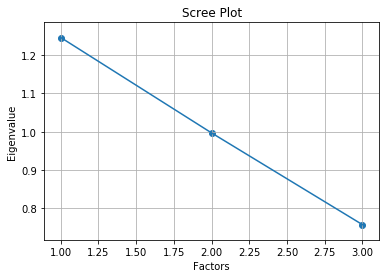

In [33]:
plt.scatter(range(1,df3.shape[1]+1),ev)
plt.plot(range(1,df3.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [34]:
fa3.get_factor_variance()

,Factor1,Factor2,Factor3
SS Loadings,0.503297,0.056368,0.000000
Proportion Var,0.167766,0.018789,0.000000
Cumulative Var,0.167766,0.186555,0.186555


In [45]:
factor_loadings3=fa3.loadings
factor_loadings3.applymap(lambda x: np.where(x<0.0, ' ', round(x, 2)))

,Factor1,Factor2,Factor3
gender,0.06,0.19,0.0
education,0.49,,0.0
age,0.51,0.09,0.0


## __Solo el Factor 1, sería significativo para las variables education y Age.__

In [1]:
#df3=df[["gender","education","age"]]
#y=factor_loadings3.Factor1
#modelo_lineal=smf.ols("y,gender~education~age",df3)
#modelo_lineal=modelo_lineal.fit()
#modelo_lineal.summary()
